In [1]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
kernel = np.ones((2,2),np.uint8)

In [3]:
c = cv2.VideoCapture(0)
_,f = c.read()
out = cv2.VideoWriter('result.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (f.shape[1],f.shape[0]),1)

In [4]:
radios = []
tiempo = []
start = time.time()

In [5]:
# Procesamos cada frame del vídeo
while(c.isOpened()):
    ret, frame = c.read()
    if ret==True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Para cada cara hallada, extraer la region de interés
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            # Para cada ojo, extraer la región de interés
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                roi_eyes = roi_color[ey:ey+eh, ex:ex+ew]
                roi_eyes_gray = roi_gray[ey:ey+eh, ex:ex+ew]

                # aplicar una transformación morfológica y la transformada de Hough Circular
                roi_eyes_gray  = cv2.morphologyEx(roi_eyes_gray, cv2.MORPH_ERODE, kernel)
                circles = cv2.HoughCircles(roi_eyes_gray,cv2.HOUGH_GRADIENT,1,30,param1=100,param2=20,minRadius=5,maxRadius=50)

                # Dibujar cada círculo hallado
                if circles is not None:
                    circles = np.uint16(np.around(circles))
                    for i in circles[0,:]:
                        cv2.circle(roi_eyes,(i[0],i[1]),i[2],(0,255,0),1)
                    radios.append(i[2])
                else:
                    radios.append(-1)
                
                # Tomar el tiempo 
                tiempo.append(time.time() - start)        
        
        # escribir el frame
        cv2.imshow('frame',frame)
        try:
            out.write(frame.astype('uint8'))
        except:
            print("Error: video frame did not write")
        
        if 0xFF & cv2.waitKey(5) == 27:
            break
    else:
        break

In [6]:
c.release()
out.release()
cv2.destroyAllWindows()

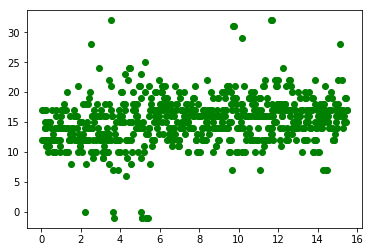

In [7]:
plt.plot(tiempo, radios, 'go')